Link al Colab: https://drive.google.com/file/d/1MGxPz2XipbmCfSP-4EJ3QW6r8K55QpqN/view?usp=sharing

Link del archivo csv de datos para el ejemplo de datos del mundo real: https://drive.google.com/file/d/1wzJoAqedVZ0ZKADvru-DfWxKFZyg9vfN/view?usp=sharing


In [ ]:
pip install -U fortran-magic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.5 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
pip install "setuptools <65"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 10.0 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 75.1.0
    Uninstalling setuptools-75.1.0:
      Successfully uninstalled setuptools-75.1.0


In [ ]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00',
                             '2017-01-07 00:00:00+00:00',
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [ ]:
assert ran_the_first_cell, "Oh noes!"

In [ ]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [ ]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [ ]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [ ]:
# Lists can also be sliced, which makes a copy of elements between
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [ ]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [ ]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [ ]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [ ]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [ ]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [ ]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [ ]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}

In [ ]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'David': 'Hume',
 'Immanuel': 'Kant',
 'Bertrand': 'Russell',
 'Ludwig': 'Wittgenstein'}

In [ ]:
del philosophers['David']
philosophers

{'Immanuel': 'Kant', 'Bertrand': 'Russell', 'Ludwig': 'Wittgenstein'}

In [ ]:
# No slicing.
philosophers['Bertrand':'Immanuel']

TypeError: unhashable type: 'slice'

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [ ]:
4 * "a"

'aaaa'

In [ ]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [ ]:
%%time

matmul(a, b)

CPU times: user 33 µs, sys: 5 µs, total: 38 µs
Wall time: 41.5 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

**My own example 0 - cpu info**

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed bhi
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
ad

**My own example 1 - Changing in matmul(A, B) Python len(B) (# of rows of B) for len(A[0]) (# of columns of A)**

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])): #Cambiando len(B) por len(A[0])
                out[i][j] += A[i][k] * B[k][j]
    return out

**My own example 2 - Verifiying error with in matmul(A, B) Python with the original matrices when changing len(B) (# of rows of B) for len(A[0]) (# of colums of A)**

In [ ]:
matmul(a,b)

IndexError: list index out of range

**My own example 3 - Chekcing the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    # Comprobacion de la condicion de compatibilidad de la multiplicacion de matrices
    if len(A[0]) != len(B):
        raise ValueError("El numero de columnas de A debe ser igual al numero de filas de B para realizar la multiplicacion.")

    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])):  # Cambiando len(B) por len(A[0])
                out[i][j] += A[i][k] * B[k][j]
    return out


**My own example 4 -  Verifiying error with in matmul(A, B) Python when checking the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
matmul(a,b)

ValueError: El numero de columnas de A debe ser igual al numero de filas de B para realizar la multiplicacion.

**My own example 5 - Deifining A and B that are compatible for multiplcation**

In [ ]:
A = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

B = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]


**My own example 6 - Runinng the correct Python matrix multiplication code with the matrices with dimensions compatible for multiplication.**

In [ ]:
matmul(A,B)

[[24, 30, 36], [33, 42, 51]]

In [ ]:
import random

In [ ]:
random.normalvariate(0,1)

-1.0898363648954097

In [ ]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.8060113968678574, 0.8655034914665191, 0.15120062961730396],
 [0.5846488141624757, 0.05974003280407736, 0.2695917373583444]]

**My own example 7 - Running 10 times matmul(randa, randb) with randa and randb a randon matrices of 600 x 100 and 100 x 600 and calulating the average execution time**

In [ ]:
import time

randa = random_matrix(600, 100)
randb = random_matrix(100, 600)

# Ejecutar matmul(randa, randb) 10 veces y calcular el tiempo promedio
total_time = 0
for i in range(10):
    start_time = time.time()
    x = matmul(randa, randb)
    end_time = time.time()
    total_time += (end_time - start_time)

average_time = total_time / 10
print(f"Tiempo promedio de ejecución: {average_time:.2f} segundos")


Tiempo promedio de ejecución: 9.77 segundos


**My own example 8 - Creating the average execution time data frame and adding Python's average execution time**

In [ ]:
import pandas as pd

data = {
    'Language': ['Python'],
    'Average Secs': [average_time]
}

df = pd.DataFrame(data)

df


,Language,Average Secs
0,Python,9.765856


**My own example 9 - Running 10 times randa and randb mutiplicaction as NumPy arrays  adding NumPy's average execution time**

In [ ]:
import numpy as np
import time

# Convertir las matrices randa y randb a arrays de NumPy
randa_np = np.array(randa)
randb_np = np.array(randb)

# Ejecutar la multiplicacion 10 veces y calcular el tiempo promedio
total_time_numpy = 0
for _ in range(10):
    start_time = time.time()
    x_np = np.dot(randa_np, randb_np)
    end_time = time.time()
    total_time_numpy += (end_time - start_time)

average_time_numpy = total_time_numpy / 10
print(f"Tiempo promedio de ejecución con NumPy: {average_time_numpy:.4f} segundos")

# Anadir el tiempo promedio de NumPy al DataFrame existente
df.loc[len(df)] = ['NumPy', average_time_numpy]

df


Tiempo promedio de ejecución con NumPy: 0.0053 segundos


,Language,Average Secs
0,Python,9.765856
1,NumPy,0.005277


In [ ]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 10.1 s, sys: 19 ms, total: 10.1 s
Wall time: 10.2 s


In [ ]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [ ]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result

    result = sum(xs * ys)
end

In [ ]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [ ]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 14.2 ms, sys: 0 ns, total: 14.2 ms
Wall time: 13.9 ms


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 202 µs, sys: 3 µs, total: 205 µs
Wall time: 210 µs


333328333350000.0

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


**My own example 10 - Deifining A (2x2)  and B (2x2)**

In [ ]:
A = random_matrix(2, 2)
B = random_matrix(2, 2)

**My own example 11 - Defining Fortran subroutine matmul(A,B) for 2x2 matrices**

In [ ]:
%%fortran
subroutine fortran_matmul(A, B, C)
    real, intent(in) :: A(2,2), B(2,2)
    real, intent(out) :: C(2,2)

    C(1,1) = A(1,1) * B(1,1) + A(1,2) * B(2,1)
    C(1,2) = A(1,1) * B(1,2) + A(1,2) * B(2,2)
    C(2,1) = A(2,1) * B(1,1) + A(2,2) * B(2,1)
    C(2,2) = A(2,1) * B(1,2) + A(2,2) * B(2,2)
end subroutine fortran_matmul


**My own example 12 -Run Fortran subroutine matmul(A,B) with a and b 2x2 matrices**

In [ ]:
A1 = np.array(A)
B1 = np.array(B)

fortran_matmul(A, B)

array([[0.4886142 , 0.48164582],
       [0.36171603, 0.35844153]], dtype=float32)

**My own example 13 - Defining Fortran subroutine matmul(A,B) for 600x100 and 100x600 matrices**

In [ ]:
%%fortran
subroutine fortran_matmul(A, B, C)
    ! Definicion de matrices de entrada y salida con dimensiones especificas
    real, intent(in) :: A(600,100), B(100,600)
    real, intent(out) :: C(600,600)
    integer :: i, j, k

    ! Inicializar matriz de salida C en cero
    C = 0.0

    ! Realizar la multiplicacion de matrices
    do i = 1, 600
        do j = 1, 600
            do k = 1, 100
                C(i, j) = C(i, j) + A(i, k) * B(k, j)
            end do
        end do
    end do
end subroutine fortran_matmul


**My own example 14 -Run Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices**

In [ ]:
A = np.random.rand(600, 100).astype(np.float32)
B = np.random.rand(100, 600).astype(np.float32)

fortran_matmul(A, B)

array([[26.766163, 25.82936 , 26.677362, ..., 24.021215, 26.7237  ,
        25.356264],
       [27.694214, 28.817234, 27.568043, ..., 25.182615, 26.819715,
        25.745655],
       [26.959612, 24.839321, 26.680899, ..., 23.787169, 24.113905,
        25.501635],
       ...,
       [25.053871, 23.498802, 24.185751, ..., 22.389126, 24.743351,
        24.675533],
       [27.300104, 25.85258 , 27.197086, ..., 25.90947 , 26.94503 ,
        27.047491],
       [28.473757, 27.273582, 27.469769, ..., 26.688768, 28.01966 ,
        27.86436 ]], dtype=float32)

**My own example 15 - Running 10 times the  Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices and adding Fortran magic average execution time to the data frame**

In [ ]:
import pandas as pd
import numpy as np
import time

total_time_fortran = 0
for _ in range(10):
    start_time = time.time()
    fortran_matmul(A, B)  # Llamada a la subrutina de multiplicacion en Fortran
    end_time = time.time()
    total_time_fortran += (end_time - start_time)

average_time_fortran = total_time_fortran / 10
print(f"Tiempo promedio de ejecución con Fortran: {average_time_fortran:.4f} segundos")

df.loc[len(df)] = ['Fortranmagic', average_time_fortran]

df

Tiempo promedio de ejecución con Fortran: 0.0467 segundos


,Language,Average Secs
0,Python,9.765856
1,NumPy,0.005277
2,Fortranmagic,0.046724


**My own example 16 - Creating a  Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile matrixMultiplication.f95
      program MatrixMultiplication
          implicit none
          integer, parameter :: n1 = 600, n2 = 100, n3 = 600
          real :: A(n1, n2), B(n2, n3), C(n1, n3)
          integer :: i, j, k, repeat
          real :: start_time, end_time, total_time

          ! Inicializar matrices A y B con valores aleatorios
          call random_number(A)
          call random_number(B)

          ! Inicializar tiempo total
          total_time = 0.0

          ! Multiplicar matrices A y B 10 veces
          do repeat = 1, 10
              ! Inicializar matriz C a ceros
              C = 0.0

              ! Medir el tiempo de una multiplicacion
              call cpu_time(start_time)
              do i = 1, n1
                  do j = 1, n3
                      do k = 1, n2
                          C(i,j) = C(i,j) + A(i,k) * B(k,j)
                      end do
                  end do
              end do
              call cpu_time(end_time)

              ! Sumar el tiempo de esta iteracion
              total_time = total_time + (end_time - start_time)
          end do

          ! Calcular y mostrar el tiempo promedio de ejecucion
          print *, "Tiempo promedio de ejecucion para 10 multiplicaciones: ", total_time / 10.0, " segundos"

          stop
      end program MatrixMultiplication


Writing matrixMultiplication.f95


**My own example 17 - Running the Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!gfortran matrixMultiplication.f95 -o matrixMultiplication
!./matrixMultiplication

 Tiempo promedio de ejecucion para 10 multiplicaciones:   0.252034009      segundos


**My own example 18 - Adding Fortran average execution time to the data frame**

In [ ]:
import subprocess

# Ejecutar el programa Fortran y capturar la salida
result = subprocess.run(['./matrixMultiplication'], stdout=subprocess.PIPE)

# Convertir la salida de bytes a string
output = result.stdout.decode('utf-8')

# Extraer el tiempo promedio desde la salida
# Suponiendo que la salida tiene el formato: "Tiempo promedio de ejecucion para 10 multiplicaciones: X.XXXX segundos"
for line in output.splitlines():
    if "Tiempo promedio" in line:
        average_time_fortran = float(line.split()[-2])  # Extrae el valor numerico del tiempo

df.loc[len(df)] = ['Fortran', average_time_fortran]

df


,Language,Average Secs
0,Python,9.765856
1,NumPy,0.005277
2,Fortranmagic,0.046724
3,Fortran,0.249128


**My own example 19 - Creating a c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile matrix_multiplication.c

#include <stdio.h>
#include <stdlib.h>
#include <time.h>

#define N1 600
#define N2 100
#define N3 600

int main() {
    float A[N1][N2], B[N2][N3], C[N1][N3];
    int i, j, k, repeat;
    clock_t start, end;
    double total_time = 0.0;

    // Inicializar matrices A y B con valores aleatorios
    srand(time(0)); // Semilla para los números aleatorios
    for (i = 0; i < N1; i++) {
        for (j = 0; j < N2; j++) {
            A[i][j] = (float)rand() / RAND_MAX;
        }
    }

    for (i = 0; i < N2; i++) {
        for (j = 0; j < N3; j++) {
            B[i][j] = (float)rand() / RAND_MAX;
        }
    }

    // Multiplicar las matrices A y B 10 veces
    for (repeat = 0; repeat < 10; repeat++) {
        // Inicializar matriz C con ceros
        for (i = 0; i < N1; i++) {
            for (j = 0; j < N3; j++) {
                C[i][j] = 0;
            }
        }

        // Medir tiempo de ejecucion de una multiplicacion
        start = clock();
        for (i = 0; i < N1; i++) {
            for (j = 0; j < N3; j++) {
                for (k = 0; k < N2; k++) {
                    C[i][j] += A[i][k] * B[k][j];
                }
            }
        }
        end = clock();

        // Sumar tiempo de ejecucion
        total_time += ((double)(end - start)) / CLOCKS_PER_SEC;
    }

    // Calcular el tiempo promedio de ejecucion
    double avg_time = total_time / 10.0;
    printf("Tiempo promedio de ejecucion para 10 multiplicaciones: %f segundos\n", avg_time);

    return 0;
}


Writing matrix_multiplication.c


**My own example 20 - Running the c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!gcc matrix_multiplication.c -o matrix_multiplication
!./matrix_multiplication

Tiempo promedio de ejecucion para 10 multiplicaciones: 0.276686 segundos


**My own example 21 - Adding c average execution time to the data frame**

In [ ]:
import subprocess

# Ejecutar el programa C y capturar la salida
result = subprocess.run(['./matrix_multiplication'], stdout=subprocess.PIPE)

# Convertir la salida de bytes a string
output = result.stdout.decode('utf-8')

# Extraer el tiempo promedio desde la salida
# Suponiendo que la salida tiene el formato: "Tiempo promedio de ejecucion para 10 multiplicaciones: X.XXXXXX segundos"
for line in output.splitlines():
    if "Tiempo promedio" in line:
        average_time_c = float(line.split()[-2])  # Extrae el valor numerico del tiempo

df.loc[len(df)] = ['C', average_time_c]

df


,Language,Average Secs
0,Python,9.765856
1,NumPy,0.005277
2,Fortranmagic,0.046724
3,Fortran,0.249128
4,C,0.156014


**My own example 22 - Creating a C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile matrix_multiplication.cpp
#include <iostream>
#include <vector>
#include <ctime>

using namespace std;

int main() {
    const int N1 = 600;
    const int N2 = 100;
    const int N3 = 600;

    // Definir las matrices A, B y C
    vector<vector<float>> A(N1, vector<float>(N2));
    vector<vector<float>> B(N2, vector<float>(N3));
    vector<vector<float>> C(N1, vector<float>(N3, 0.0));

    // Inicializar las matrices A y B con valores aleatorios
    srand(time(0)); // Semilla para los numeros aleatorios
    for (int i = 0; i < N1; ++i) {
        for (int j = 0; j < N2; ++j) {
            A[i][j] = static_cast<float>(rand()) / RAND_MAX;
        }
    }
    for (int i = 0; i < N2; ++i) {
        for (int j = 0; j < N3; ++j) {
            B[i][j] = static_cast<float>(rand()) / RAND_MAX;
        }
    }

    // Variable para medir el tiempo total de ejecucion
    clock_t start, end;
    double total_time = 0.0;

    // Multiplicar las matrices A y B 10 veces
    for (int repeat = 0; repeat < 10; ++repeat) {
        // Reiniciar la matriz C a ceros
        for (int i = 0; i < N1; ++i) {
            fill(C[i].begin(), C[i].end(), 0.0);
        }

        // Medir el tiempo de una multiplicacion
        start = clock();
        for (int i = 0; i < N1; ++i) {
            for (int j = 0; j < N3; ++j) {
                for (int k = 0; k < N2; ++k) {
                    C[i][j] += A[i][k] * B[k][j];
                }
            }
        }
        end = clock();

        // Sumar el tiempo de ejecucion de la iteracion actual
        total_time += static_cast<double>(end - start) / CLOCKS_PER_SEC;
    }

    // Calcular el tiempo promedio de ejecucion
    double avg_time = total_time / 10.0;
    cout << "Tiempo promedio de ejecucion para 10 multiplicaciones: " << avg_time << " segundos" << endl;

    return 0;
}


Writing matrix_multiplication.cpp


**My own example 23 - Running the C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!g++ matrix_multiplication.cpp -o matrix_multiplication
!./matrix_multiplication

Tiempo promedio de ejecucion para 10 multiplicaciones: 0.762667 segundos


**My own example 24 - Adding C++ average execution time to the data frame**

In [ ]:
import subprocess

# Ejecutar el programa C++ y capturar la salida
result = subprocess.run(['./matrix_multiplication'], stdout=subprocess.PIPE)

# Convertir la salida de bytes a string
output = result.stdout.decode('utf-8')

# Extraer el tiempo promedio desde la salida
# Suponiendo que la salida tiene el formato: "Tiempo promedio de ejecucion para 10 multiplicaciones: X.XXXXXX segundos"
for line in output.splitlines():
    if "Tiempo promedio" in line:
        average_time_cpp = float(line.split()[-2])  # Extrae el valor numerico del tiempo

df.loc[len(df)] = ['C++', average_time_cpp]

df


,Language,Average Secs
0,Python,9.765856
1,NumPy,0.005277
2,Fortranmagic,0.046724
3,Fortran,0.249128
4,C,0.156014
5,C++,0.617348


**My own example 25 - Creating a Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile MatrixMultiplication.java

import java.util.Random;

public class MatrixMultiplication {

    public static void main(String[] args) {
        int N1 = 600;
        int N2 = 100;
        int N3 = 600;

        // Definir las matrices A, B y C
        float[][] A = new float[N1][N2];
        float[][] B = new float[N2][N3];
        float[][] C = new float[N1][N3];

        // Inicializar las matrices A y B con valores aleatorios
        Random rand = new Random();
        for (int i = 0; i < N1; i++) {
            for (int j = 0; j < N2; j++) {
                A[i][j] = rand.nextFloat();
            }
        }
        for (int i = 0; i < N2; i++) {
            for (int j = 0; j < N3; j++) {
                B[i][j] = rand.nextFloat();
            }
        }

        // Medir el tiempo total de las 10 multiplicaciones
        long startTime, endTime;
        double totalTime = 0;

        for (int repeat = 0; repeat < 10; repeat++) {
            // Reiniciar la matriz C a ceros
            for (int i = 0; i < N1; i++) {
                for (int j = 0; j < N3; j++) {
                    C[i][j] = 0;
                }
            }

            // Medir el tiempo de una multiplicacion
            startTime = System.nanoTime();
            for (int i = 0; i < N1; i++) {
                for (int j = 0; j < N3; j++) {
                    for (int k = 0; k < N2; k++) {
                        C[i][j] += A[i][k] * B[k][j];
                    }
                }
            }
            endTime = System.nanoTime();

            // Sumar el tiempo de ejecucion de la iteracion actual
            totalTime += (endTime - startTime) / 1e9; // Convertir a segundos
        }

        // Calcular el tiempo promedio de ejecucion
        double avgTime = totalTime / 10.0;
        System.out.println("Tiempo promedio de ejecucion para 10 multiplicaciones: " + avgTime + " segundos");
    }
}


Writing MatrixMultiplication.java


**My own example 26 - Running the Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!javac MatrixMultiplication.java
!java MatrixMultiplication

Tiempo promedio de ejecucion para 10 multiplicaciones: 0.18249142100000001 segundos


**My own example 27 - Adding Java average execution time to the data frame**

In [ ]:
import subprocess

# Ejecutar el programa Java y capturar la salida
result = subprocess.run(['java', 'MatrixMultiplication'], stdout=subprocess.PIPE)

# Convertir la salida de bytes a string
output = result.stdout.decode('utf-8')

# Extraer el tiempo promedio desde la salida
# Suponiendo que la salida tiene el formato: "Tiempo promedio de ejecucion para 10 multiplicaciones: X.XXXXXX segundos"
for line in output.splitlines():
    if "Tiempo promedio" in line:
        average_time_java = float(line.split()[-2])  # Extrae el valor numerico del tiempo

df.loc[len(df)] = ['Java', average_time_java]

df


,Language,Average Secs
0,Python,9.765856
1,NumPy,0.005277
2,Fortranmagic,0.046724
3,Fortran,0.249128
4,C,0.156014
5,C++,0.617348
6,Java,0.129576


**My own example 28 - Creating a Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile matrixMultiplication.js

function multiplyMatrices(A, B) {
    const N1 = A.length;
    const N2 = A[0].length;
    const N3 = B[0].length;
    const C = Array(N1).fill().map(() => Array(N3).fill(0));

    for (let i = 0; i < N1; i++) {
        for (let j = 0; j < N3; j++) {
            for (let k = 0; k < N2; k++) {
                C[i][j] += A[i][k] * B[k][j];
            }
        }
    }

    return C;
}

// Inicializar matrices A (600x100) y B (100x600) con valores aleatorios
const N1 = 600, N2 = 100, N3 = 600;
const A = Array.from({ length: N1 }, () => Array.from({ length: N2 }, () => Math.random()));
const B = Array.from({ length: N2 }, () => Array.from({ length: N3 }, () => Math.random()));

// Medir el tiempo promedio de ejecucion para 10 multiplicaciones
let totalTime = 0;

for (let repeat = 0; repeat < 10; repeat++) {
    const startTime = Date.now();
    multiplyMatrices(A, B);
    const endTime = Date.now();

    totalTime += (endTime - startTime) / 1000;  // Convertir a segundos
}

const avgTime = totalTime / 10;
console.log(`Tiempo promedio de ejecucion para 10 multiplicaciones: ${avgTime} segundos`);


Writing matrixMultiplication.js


**My own example 29 - Running the Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!node matrixMultiplication.js

Tiempo promedio de ejecucion para 10 multiplicaciones: 0.3059 segundos


**My own example 30 - Adding Javascript average execution time to the data frame**

In [ ]:
import subprocess

# Ejecutar el programa JavaScript y capturar la salida
result = subprocess.run(['node', 'matrixMultiplication.js'], stdout=subprocess.PIPE)

# Convertir la salida de bytes a string
output = result.stdout.decode('utf-8')

# Extraer el tiempo promedio desde la salida
# Suponiendo que la salida tiene el formato: "Tiempo promedio de ejecucion para 10 multiplicaciones: X.XXXXXX segundos"
for line in output.splitlines():
    if "Tiempo promedio" in line:
        average_time_js = float(line.split()[-2])  # Extrae el valor numerico del tiempo

df.loc[len(df)] = ['JavaScript', average_time_js]

df


,Language,Average Secs
0,Python,9.765856
1,NumPy,0.005277
2,Fortranmagic,0.046724
3,Fortran,0.249128
4,C,0.156014
5,C++,0.617348
6,Java,0.129576
7,JavaScript,0.298300


**My own example 31 - Finding the minimun average esecuiton time in the data frame**

In [ ]:
# Encontrar el tiempo promedio minimo en el DataFrame
min_avg_time = df['Average Secs'].min()

# Encontrar el lenguaje asociado al tiempo promedio minimo
min_time_language = df[df['Average Secs'] == min_avg_time]['Language'].values[0]

print(f'El menor tiempo promedio de ejecucion es {min_avg_time} segundos, por {min_time_language}.')


El menor tiempo promedio de ejecucion es 0.005277323722839356 segundos, por NumPy.


**My own example 32 - Adding the Speed factor columne to the data frame**

In [ ]:
# Encontrar el tiempo promedio minimo
min_avg_time = df['Average Secs'].min()

# Agregar la columna de 'Speed Factor' al DataFrame
df['Speed Factor'] = df['Average Secs'] / min_avg_time

df


,Language,Average Secs,Speed Factor
0,Python,9.765856,1850.531866
1,NumPy,0.005277,1.000000
2,Fortranmagic,0.046724,8.853795
3,Fortran,0.249128,47.207207
4,C,0.156014,29.563091
5,C++,0.617348,116.981264
6,Java,0.129576,24.553325
7,JavaScript,0.298300,56.524863


**My own example 33 - Sorting the the data frame by average execution time**

In [ ]:
# Ordenar el DataFrame por 'Average Secs' en orden ascendente (de menor a mayor tiempo)
df_sorted = df.sort_values(by='Average Secs', ascending=True)

df_sorted


,Language,Average Secs,Speed Factor
1,NumPy,0.005277,1.000000
2,Fortranmagic,0.046724,8.853795
6,Java,0.129576,24.553325
4,C,0.156014,29.563091
3,Fortran,0.249128,47.207207
7,JavaScript,0.298300,56.524863
5,C++,0.617348,116.981264
0,Python,9.765856,1850.531866


## Why is the Python Version so Much Slower?

In [ ]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [ ]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [ ]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [ ]:
data + data

array([2, 4, 6, 8])

In [ ]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 1.66 ms, sys: 0 ns, total: 1.66 ms
Wall time: 1.6 ms


333328333350000.0

In [ ]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 167 µs, sys: 5.07 ms, total: 5.23 ms
Wall time: 7.86 ms


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 201 µs, sys: 2 µs, total: 203 µs
Wall time: 210 µs


333328333350000.0

In [ ]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

ValueError: invalid literal for int() with base 10: 'foo'

In [ ]:
# We also can't grow an array once it's created.
data.append(3)

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [ ]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

array([[1, 2],
       [3, 4]])

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [ ]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [ ]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [ ]:
# Unary functions.
np.sqrt(data)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739]])

In [ ]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]])

In [ ]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]])

In [ ]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [ ]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([0.        , 0.34185385, 0.64251645, 0.86575984, 0.98468459,
       0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [ ]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

In [ ]:
sines[:3]  # First three elements

array([0.        , 0.34185385, 0.64251645])

In [ ]:
sines[5:]  # Elements from 5 on.

array([0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [ ]:
sines[::2]  # Every other element.

array([0.        , 0.64251645, 0.98468459, 0.8665558 , 0.34335012])

In [ ]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [0.64251645 0.86575984 0.98468459 0.98496101 0.8665558  0.64373604]


In [ ]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]


array([0.        , 0.98468459, 0.64373604])

In [ ]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [ ]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

In [ ]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

In [ ]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [ ]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'], dtype='<U1')

In [ ]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31',
       '2017-02-01'], dtype='datetime64[D]')


In [ ]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [ ]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [ ]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [5, 6]])

In [ ]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

In [ ]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [ ]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [ ]:
variance(np.random.standard_normal(1000))

0.9711441718271239

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [ ]:
data = np.arange(30)
data.mean()

14.5

- ...but we can do more interesting things with multi-dimensional arrays.

In [ ]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [ ]:
data.mean()

14.5

In [ ]:
data.mean(axis=0)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

In [ ]:
data.mean(axis=1)

array([ 4.5, 14.5, 24.5])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [ ]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


In [ ]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [ ]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for:
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [ ]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

,0
a,1
b,2
c,3
d,4
e,5


In [ ]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [ ]:
# We can look up values out of a Series by position...
s.iloc[0]

1

In [ ]:
# ... or by label.
s.loc['a']

1

In [ ]:
# Slicing works as expected...
s.iloc[:2]

,0
a,1
b,2


In [ ]:
# ...but it works with labels too!
s.loc[:'c']

,0
a,1
b,2
c,3


In [ ]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

,0
a,1
e,5


In [ ]:
# As does boolean masking.
s.loc[s > 2]

,0
c,3
d,4
e,5


In [ ]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

,0
a,10.0
c,20.0
d,30.0
z,40.0


In [ ]:
s + other_s

,0
a,11.0
b,NaN
c,23.0
d,34.0
e,NaN
z,NaN


In [ ]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

,0
a,11.0
b,0.0
c,23.0
d,34.0
e,0.0
z,0.0


In [ ]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,27.613066,30.572857,30.642857,30.340000,30.490000,123432400.0
2010-01-05,27.660807,30.625713,30.798571,30.464285,30.657143,150476200.0
2010-01-06,27.220825,30.138571,30.747143,30.107143,30.625713,138040000.0
2010-01-07,27.170504,30.082857,30.285715,29.864286,30.250000,119282800.0
2010-01-08,27.351143,30.282858,30.285715,29.865715,30.042856,111902700.0


In [ ]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

,Adj Close,Close
Date,,
2010-01-04,27.613066,30.572857
2010-01-05,27.660807,30.625713


In [ ]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

,Close,Volume
Date,,
2010-02-01,27.818571,187469100.0
2010-02-02,27.980000,174585600.0
2010-02-03,28.461428,153832000.0
2010-02-04,27.435715,189413000.0


# Rolling Operations

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

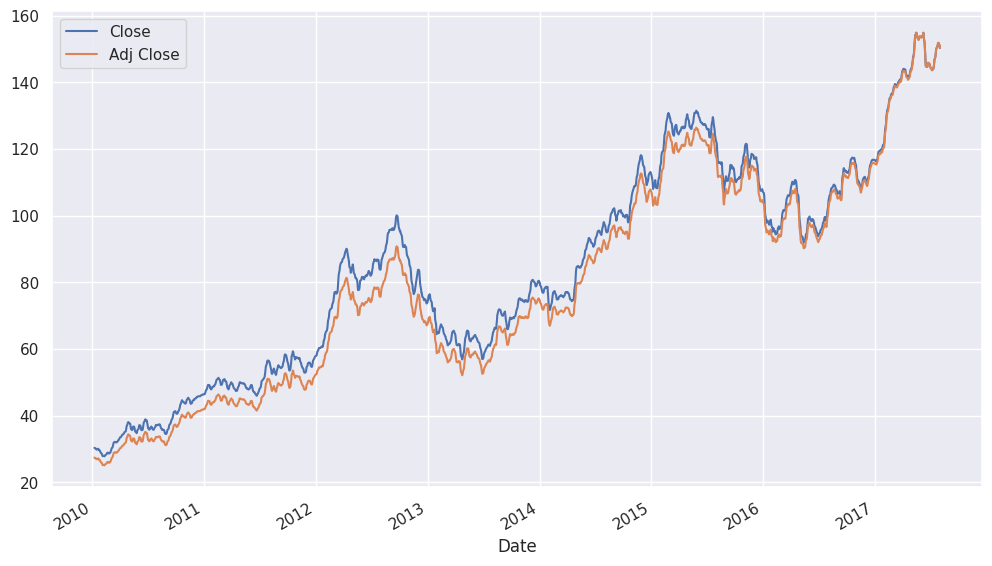

In [ ]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

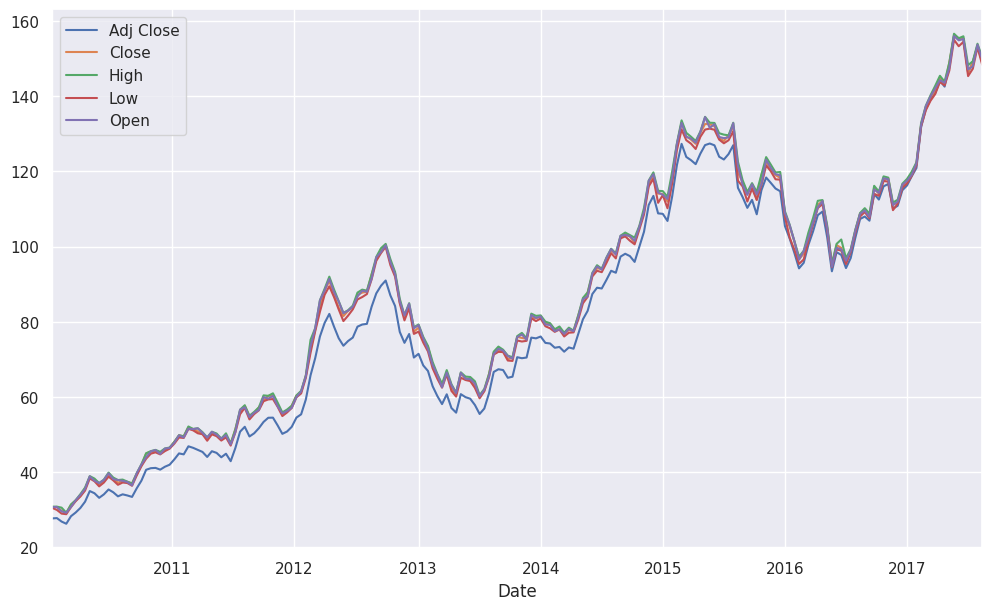

In [ ]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

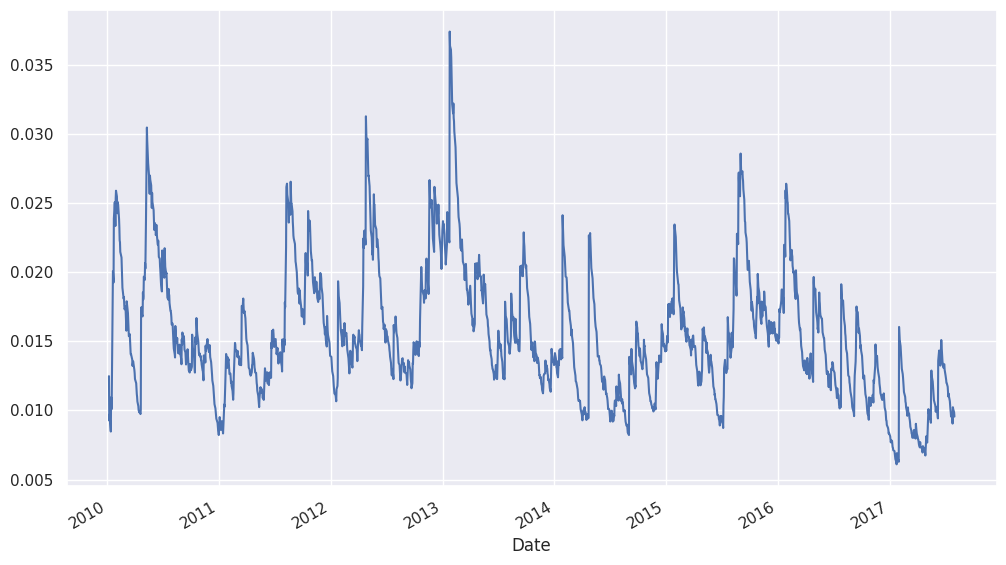

In [ ]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

---



In [ ]:
from io import BytesIO
import os
from urllib.parse import urlencode

import requests
import numpy as np
import pandas as pd


def read_avocadata(start_date, end_date, cache_loc='avocadata.html'):
    """Download avocado data to a dataframe.

    Parameters
    ----------
    """
    start_date = pd.Timestamp(start_date)
    end_date = pd.Timestamp(end_date)
    base_url = 'https://www.marketnews.usda.gov/mnp/fv-report-retail'
    query_params = {
        'class': ['FRUITS'],
        'commodity': ['AVOCADOS'],
        'compareLy': ['No'],
        'endDate': [end_date.strftime("%m/%d/%Y")],
        'format': ['excel'],
        'organic': ['ALL'],
        'portal': ['fv'],
        'region': ['ALL'],
        'repDate': [start_date.strftime("%m/%d/%Y")],
        'type': ['retail'],
    }

    url = base_url + '?' + urlencode(query_params, doseq=1)

    if not os.path.exists(cache_loc):
        resp = requests.get(url, stream=True)
        resp.raise_for_status()

        with open(cache_loc, 'wb') as f:
            for block in resp.iter_content(chunk_size=4096):
                f.write(block)
        f.close()

    with open(cache_loc, 'rb') as f:
        frame = pd.read_html(f, header=0)[0]

    # Cleanup
    frame = frame[frame['Unit'] == 'each']
    frame['Organic'] = (frame['Organic'] == 'Y')
    frame['Variety'].replace(
        {'VARIOUS GREENSKIN VARIETIES': 'GREENSKIN'},
        inplace=True,
    )
    frame['Date'] = pd.to_datetime(frame['Date'].values, utc=True)

    frame['Region'] = frame['Region'].str.replace(' U.S.', '')
    frame['Region'] = frame['Region'].str.replace(' ', '_')

    # Drop useless columns.
    return frame.drop(
        ['Class', 'Commodity', 'Environment', 'Unit', '% Marked Local'],
        axis=1,
    )

In [ ]:
avocados = read_avocadata('2014', '2016')
avocados.head()

<ipython-input-139-61bddd343f04>:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  frame['Variety'].replace(


,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.5,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.5,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.5,1.99


In [ ]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

,0
Date,"datetime64[ns, UTC]"
Region,object
Variety,object
Organic,bool
Number of Stores,int64
Weighted Avg Price,float64
Low Price,float64
High Price,float64


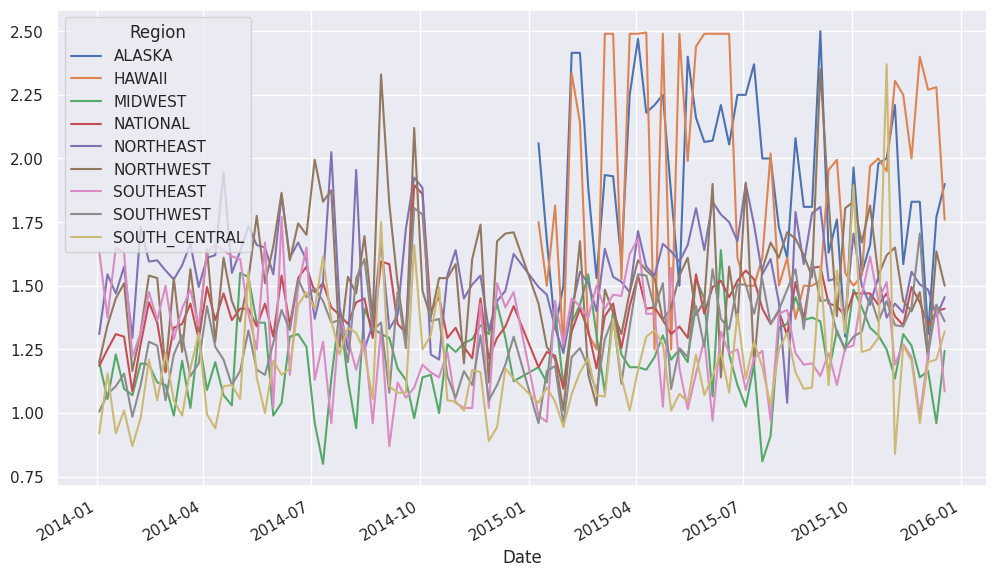

In [ ]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [ ]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)

    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

<ipython-input-143-9b1d8a2f0dc1>:17: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df


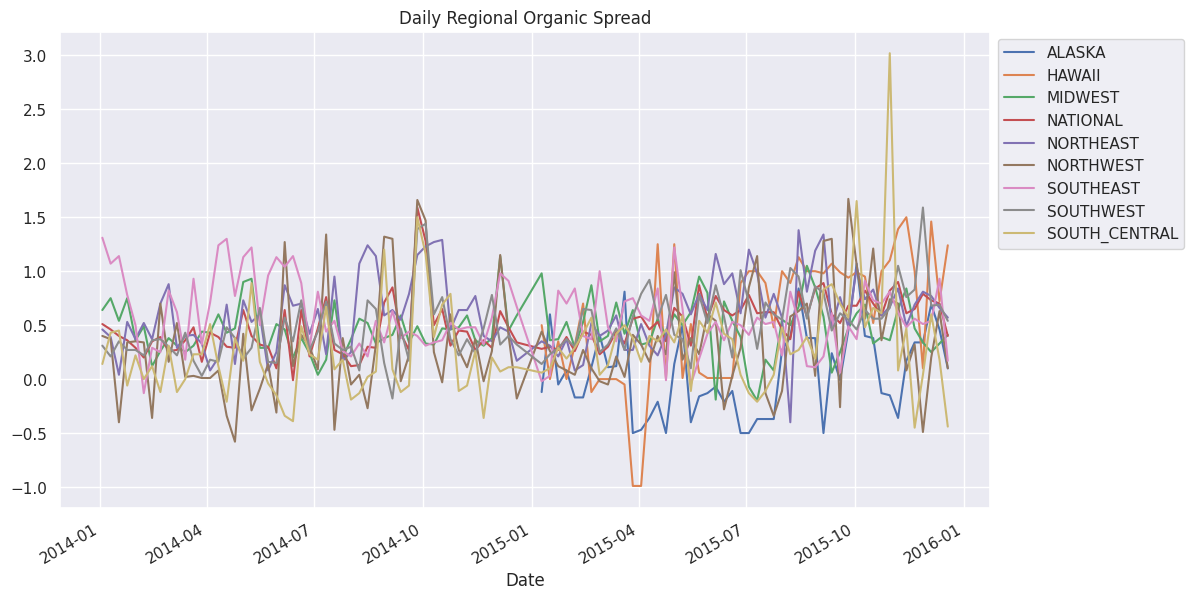

In [ ]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [ ]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

<ipython-input-143-9b1d8a2f0dc1>:17: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df


Region,ALASKA,HAWAII,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,,
ALASKA,1.000000,0.202723,0.175251,0.007844,0.051049,0.087575,0.129079,-0.070868,0.161624
HAWAII,0.202723,1.000000,-0.021116,0.373914,0.247171,0.341155,0.019388,0.159192,0.092632
MIDWEST,0.175251,-0.021116,1.000000,0.062595,-0.010213,-0.043783,0.047437,-0.059128,0.068902
NATIONAL,0.007844,0.373914,0.062595,1.000000,0.502035,0.579102,-0.040539,0.635006,0.486524
NORTHEAST,0.051049,0.247171,-0.010213,0.502035,1.000000,0.242039,-0.236225,0.360389,0.149881
NORTHWEST,0.087575,0.341155,-0.043783,0.579102,0.242039,1.000000,-0.032306,0.165992,0.349935
SOUTHEAST,0.129079,0.019388,0.047437,-0.040539,-0.236225,-0.032306,1.000000,-0.167631,-0.021176
SOUTHWEST,-0.070868,0.159192,-0.059128,0.635006,0.360389,0.165992,-0.167631,1.000000,0.254504
SOUTH_CENTRAL,0.161624,0.092632,0.068902,0.486524,0.149881,0.349935,-0.021176,0.254504,1.000000


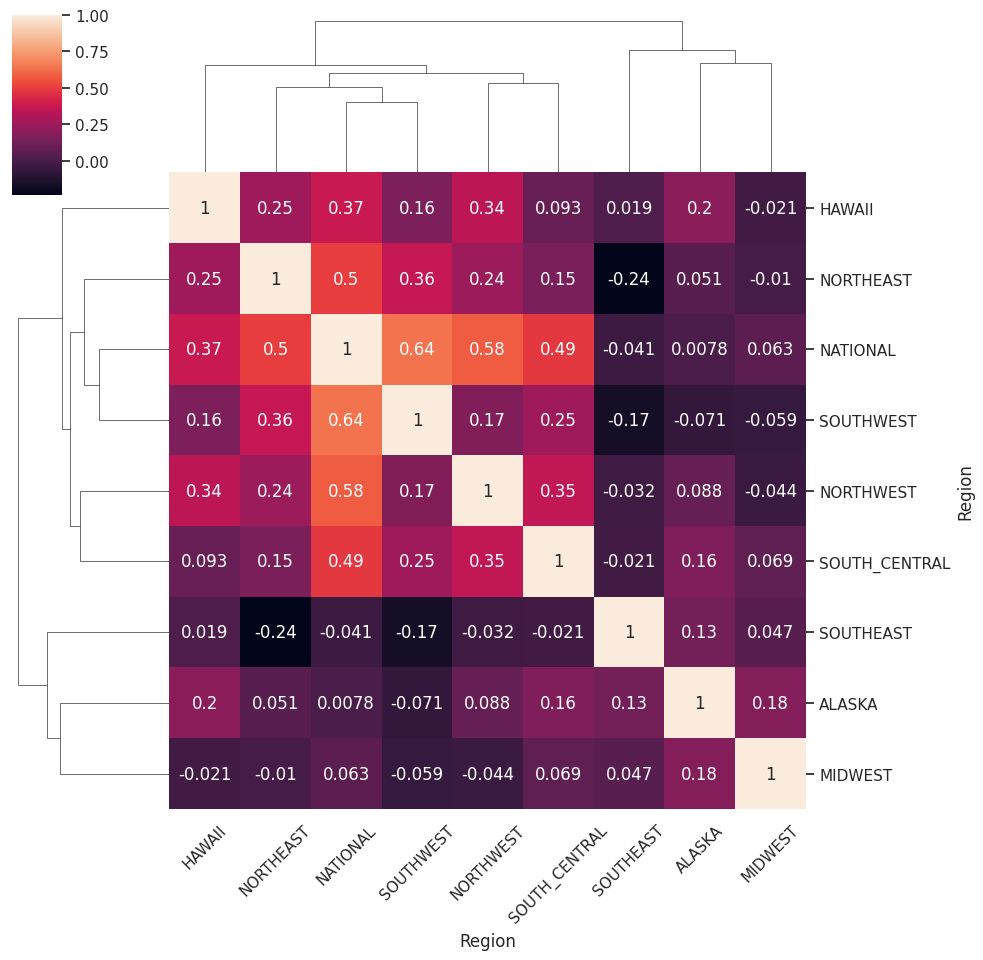

In [ ]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# "Real World" Data, My own example

---

In [ ]:
# Leemos el archivo
exagr = pd.read_csv('Exportaciones_agr_colas_no_tradicionales_y_tradicionales.csv', parse_dates=['Partida'], index_col='Partida')
exagr.head()

<ipython-input-48-fc36f8c47b65>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  exagr = pd.read_csv('Exportaciones_agr_colas_no_tradicionales_y_tradicionales.csv', parse_dates=['Partida'], index_col='Partida')


,Descripcion Partida10 Dig,Tradición productos,Departamento,Pais,Año,Mes,Exportaciones en valor (Miles USD FOB),Exportaciones en volumen (Toneladas)
Partida,,,,,,,,
101210000,"Caballos reproductores de raza pura, vivos",No tradicional,Antioquia,China,2019,Abril,0,0
101210000,"Caballos reproductores de raza pura, vivos",No tradicional,Antioquia,China,2020,Febrero,0,0
101210000,"Caballos reproductores de raza pura, vivos",No tradicional,Antioquia,China,2022,Enero,0,0
101210000,"Caballos reproductores de raza pura, vivos",No tradicional,Antioquia,China,2022,Abril,0,0
101210000,"Caballos reproductores de raza pura, vivos",No tradicional,Antioquia,China,2023,Junio,0,0


In [ ]:
exagr.dtypes

,0
Descripcion Partida10 Dig,object
Tradición productos,object
Departamento,object
Pais,object
Año,int64
Mes,object
Exportaciones en valor (Miles USD FOB),int64
Exportaciones en volumen (Toneladas),int64


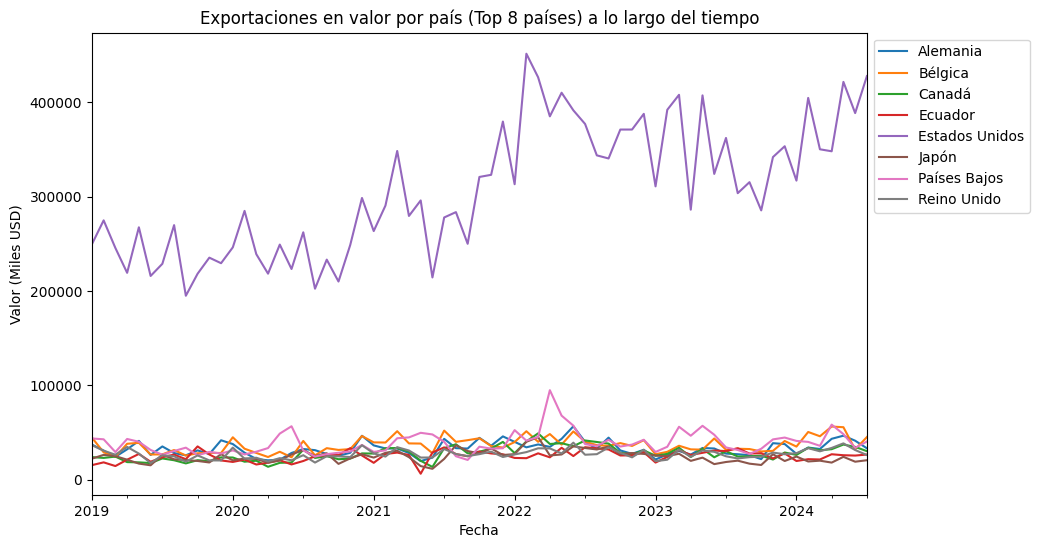

In [ ]:
# Traducimos los meses al ingles
meses_es_en = {
    "Enero": "January", "Febrero": "February", "Marzo": "March", "Abril": "April",
    "Mayo": "May", "Junio": "June", "Julio": "July", "Agosto": "August",
    "Septiembre": "September", "Octubre": "October", "Noviembre": "November", "Diciembre": "December"
}

exagr['Mes'] = exagr['Mes'].replace(meses_es_en)
exagr['Fecha'] = pd.to_datetime(exagr['Año'].astype(str) + '-' + exagr['Mes'], format='%Y-%B')

# Calculamos el valor total de exportaciones por país
total_exportaciones_pais = exagr.groupby('Pais')['Exportaciones en valor (Miles USD FOB)'].sum()

# Seleccionamos los 8 países con mayores exportaciones totales
top_8_paises = total_exportaciones_pais.nlargest(8).index

exagr_top_paises = exagr[exagr['Pais'].isin(top_8_paises)]

# Agrupamos por fecha y país, y sumamos las exportaciones en valor
exportaciones_pais = exagr_top_paises.groupby(['Fecha', 'Pais'])['Exportaciones en valor (Miles USD FOB)'].sum().unstack().ffill()

# Graficamos el valor de las exportaciones por país a lo largo del tiempo
exportaciones_pais.plot(figsize=(10, 6))
plt.title("Exportaciones en valor por país (Top 8 países) a lo largo del tiempo")
plt.ylabel("Valor (Miles USD)")
plt.xlabel("Fecha")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()


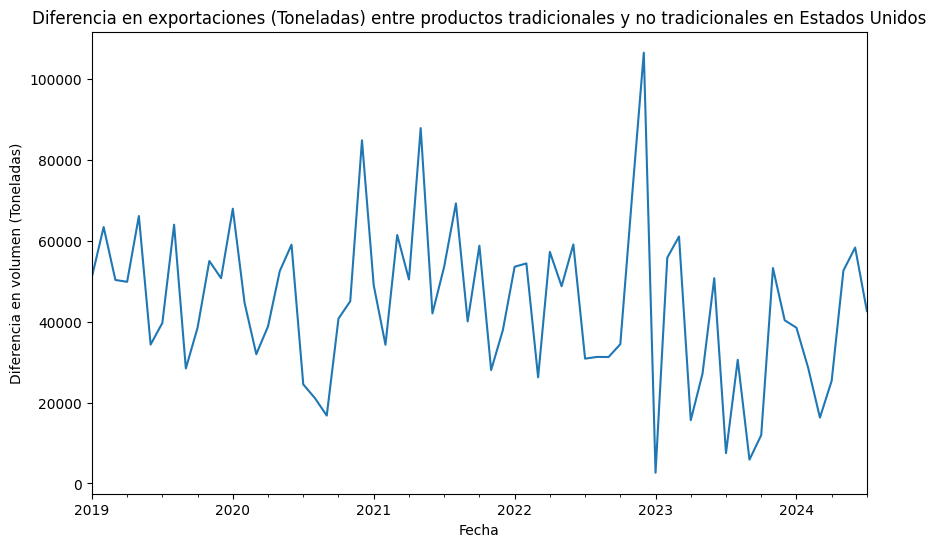

In [ ]:
meses_es_en = {
    "Enero": "January", "Febrero": "February", "Marzo": "March", "Abril": "April",
    "Mayo": "May", "Junio": "June", "Julio": "July", "Agosto": "August",
    "Septiembre": "September", "Octubre": "October", "Noviembre": "November", "Diciembre": "December"
}

exagr['Mes'] = exagr['Mes'].replace(meses_es_en)

# Convertimos 'Año' y 'Mes' en una columna de fecha
exagr['Fecha'] = pd.to_datetime(exagr['Año'].astype(str) + '-' + exagr['Mes'], format='%Y-%B')

exagr_us = exagr[exagr['Pais'] == 'Estados Unidos']

exportaciones_trad_us = exagr_us.groupby(['Fecha', 'Tradición productos'])['Exportaciones en volumen (Toneladas)'].sum().unstack().fillna(0)

spread_tradicional_us = exportaciones_trad_us['Tradicional'] - exportaciones_trad_us['No tradicional']

# Graficamos la diferencia entre exportaciones de productos tradicionales y no tradicionales por Estados Unidos
ax = spread_tradicional_us.plot(figsize=(10, 6))
plt.title("Diferencia en exportaciones (Toneladas) entre productos tradicionales y no tradicionales en Estados Unidos")
plt.ylabel("Diferencia en volumen (Toneladas)")
plt.xlabel("Fecha")

plt.show()


<Figure size 1000x800 with 0 Axes>

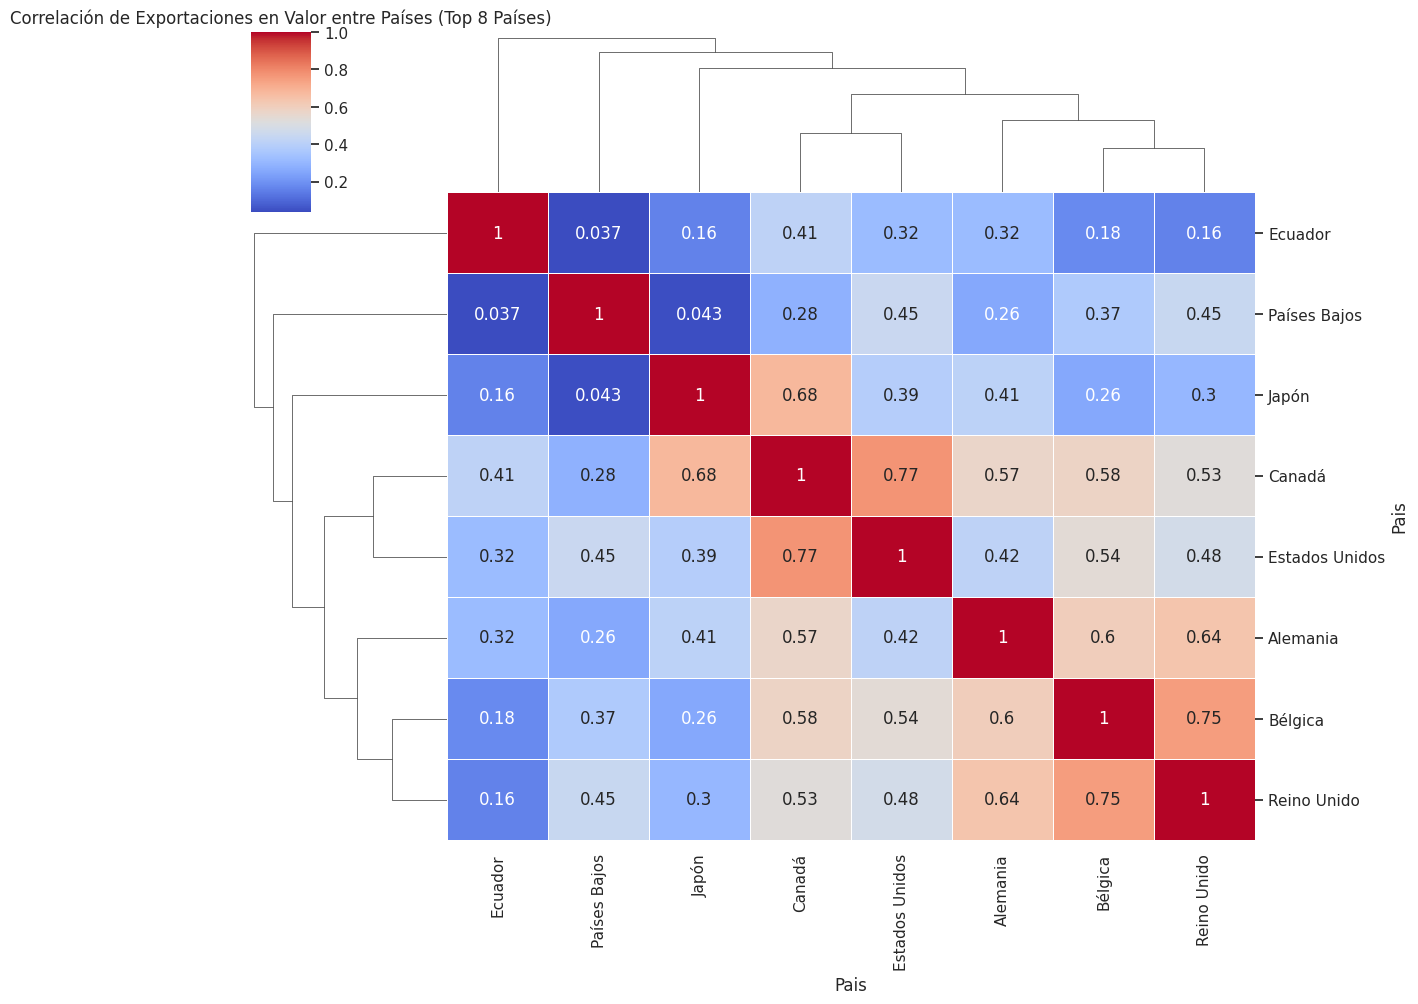

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

exagr_top_paises = exagr[exagr['Pais'].isin(top_8_paises)]

# Agrupa por fecha y país y calcula la suma de exportaciones en valor para cada país
exportaciones_por_pais = exagr_top_paises.groupby(['Fecha', 'Pais'])['Exportaciones en valor (Miles USD FOB)'].sum().unstack().fillna(0)

# Calcula la matriz de correlación entre países basada en sus exportaciones mensuales
correlacion_exportaciones = exportaciones_por_pais.corr()

# Genera el mapa de correlación utilizando Seaborn
plt.figure(figsize=(10, 8))
sns.set(font_scale=1)
clustermap = sns.clustermap(correlacion_exportaciones, annot=True, cmap="coolwarm", figsize=(12, 10), linewidths=0.5)

plt.title("Correlación de Exportaciones en Valor entre Países (Top 8 Países)")
plt.show()


# Thanks!